# Features to extract

1) Length of Signal

2) Median Amplitude (Time Domain)

3) Media Amplitude (Frequency Domain)

4) Power Spectral Density - A Power Spectral Density is the measure of signal's power content versus frequency

5) Peak Frequecy (For personal sound calibration)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from scipy import signal
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
%matplotlib inline

# Feature Extraction Functions

In [2]:
def median(data): 
    '''Returns the median of the data'''
    return np.median(data)

def psd(data):
    '''Returns Power Spectral Density'''
    freqs, power = signal.welch(data)
    return power

def length(data):
    '''Returns the time taken by the event'''
    pass

# Signal Processing

In [3]:
def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

def fftplot(filename,stdev=10,cutlow=85,cuthigh=185,cube=False):
    fs, data = wavfile.read(str(filename))
    try:
        data = (data[:,0]+data[:,1])/2 # Merging the two channels
    except IndexError:
        pass
#   Defining time domain and taking the FFT
    df = fs/len(data) # = 1/T
    t = np.linspace(0,len(data)/fs,len(data))
    freq, amp = spectrum(t,data)
    cutamp = steplow(cutlow,freq,amp)
    cutamp = stephigh(cuthigh,freq,amp)
    cutfreq = freq
    Y = np.fft.irfft(amp)
    if cube:
        Y=Y**3

    cutamp = np.abs(cutamp)**2
    
    # Fitting a Gaussian
    wid = 2*(stdev**2)
    wid1  = 100
    cen = freq[np.argmax(cutamp)]
    g = cutamp*np.exp(-((cutfreq - cen)**2)/wid)
    G = np.exp(-(cutfreq - cen)**2/wid)
    G_all = amp*np.exp(-((freq - cen)**2)/wid)
    
    YY = np.fft.irfft(G_all)
    
    return YY,t,cutamp,freq,fs

# Write Cleared Files

In [17]:
folder = 'C:/Users/nagpa/Desktop/Train Data/Data/Aayush Jindal'
os.chdir(folder)
files = os.listdir()

YY = []
for i in range(len(files)):
    data,time,amp,freq,fs = fftplot(str(files[i]),stdev=10,cutlow=85,cuthigh=185)
    YY.append(data)
    
ask = input("Would you like to write new files: ").upper()
# ask = 'yes'
if (ask == 'Y') or (ask == 'YES'):
    for i in range(len(files)):
        wavfile.write('Clear_'+str(files[i]),fs,np.array(YY[i]))
        print("Cleared files written")
else:
    print("No files written")

Would you like to write new files: Yes
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written
Cleared files written


In [18]:
folder = 'C:/Users/nagpa/Desktop/Train Data/Clear_training_data'
os.chdir(folder)

In [19]:
files = os.listdir()
PSD = []
y = []
for i in range(len(files)):
    data,t,amp,freq,fs = fftplot(str(files[i]))
    PSD.append(psd(data))
    if 'Zoom_in' in files[i]:
        y.append(1)
    elif 'Zoom_out' in files[i]:
        y.append(2)
    elif 'Snap' in files[i]:
        y.append(3)

# Only using power spectrum

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame()
df['psd'] = PSD
df.head()

,psd
0,"[6846535.789432024, 27617911.435662955, 593333..."
1,"[4035472.48743267, 16416185.074694252, 3372342..."
2,"[7914335.601514879, 32110721.192546595, 675259..."
3,"[4338954.053739742, 17663044.100906845, 363155..."
4,"[8158526.633672413, 34262633.821042284, 747876..."


In [22]:
X = pd.DataFrame(df["psd"].to_list(), columns=np.arange(129))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,6.846536e+06,2.761791e+07,5.933339e+06,4001.580247,293.718987,51.730748,13.923803,4.830375,1.985323,0.921420,...,1.686695e-08,1.327151e-08,1.013932e-08,7.454961e-09,5.205302e-09,3.379370e-09,1.968288e-09,9.652177e-10,3.653072e-10,8.282913e-11
1,4.035472e+06,1.641619e+07,3.372342e+06,3681.160951,278.371461,49.676558,13.471341,4.695634,1.936143,0.900636,...,1.662993e-08,1.308343e-08,9.993880e-09,7.346068e-09,5.127033e-09,3.325956e-09,1.934082e-09,9.446655e-10,3.529209e-10,7.799476e-11
2,7.914336e+06,3.211072e+07,6.752597e+06,5742.378468,426.105094,75.402197,20.349469,7.071463,2.909742,1.351546,...,2.481676e-08,1.952588e-08,1.491669e-08,1.096652e-08,7.656025e-09,4.969068e-09,2.892585e-09,1.416514e-09,5.337129e-10,1.199594e-10
3,4.338954e+06,1.766304e+07,3.631552e+06,3933.686101,297.383373,53.063439,14.388939,5.015292,2.067896,0.961908,...,1.776016e-08,1.397265e-08,1.067313e-08,7.845377e-09,5.475538e-09,3.552060e-09,2.065595e-09,1.008939e-09,3.769792e-10,8.333222e-11
4,8.158527e+06,3.426263e+07,7.478761e+06,4151.862690,301.690588,52.883891,14.194401,4.915310,2.017713,0.935618,...,1.706881e-08,1.343129e-08,1.026245e-08,7.546682e-09,5.270700e-09,3.423401e-09,1.995808e-09,9.810010e-10,3.740708e-10,8.604289e-11


# Process Data

In [23]:
# Normalise the data
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [24]:
# Spilt the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# Test using Classification Algorithms

## 1) K - Nearest Neighbours (KNN) 
Best result - Raw Data for Anikth, Mansha,Gautam,Pranav_Singhal,Sahir - 82.35%

Best value of K = 5 with an accuray of  66.67 %


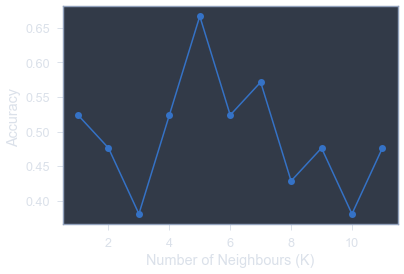

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 12
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
print("Best value of K = "+str(range(1,Ks)[np.argmax(mean_acc)]),"with an accuray of ",str(round(np.max(mean_acc)*100,2)),"%")
plt.plot(range(1,Ks),mean_acc,'-o')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

## 2) Support Vector Machine (SVM)

Best method = linear with an accuray of  47.62 %


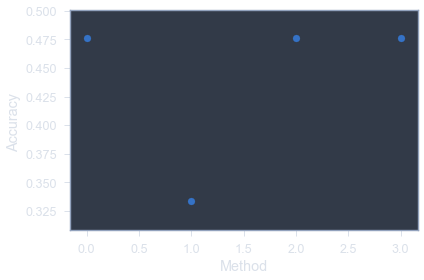

In [26]:
from sklearn import svm
method = ['linear', 'poly', 'rbf', 'sigmoid']
mean_acc = np.zeros((len(method)))

for n in range(1,len(method)+1):
    svm_clf = svm.SVC(kernel=method[n-1],gamma='scale')
    svm_clf.fit(X_train, y_train) 
    yhat = svm_clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
print("Best method = "+str(method[np.argmax(mean_acc)]),"with an accuray of ",str(round(np.max(mean_acc)*100,2)),"%")
plt.scatter(range(0,len(method)),mean_acc)
plt.ylabel('Accuracy ')
plt.xlabel('Method')
plt.tight_layout()
plt.show()

## 3) Logistic Regression 

Best C = 0.0 with an accuray of  47.62 %


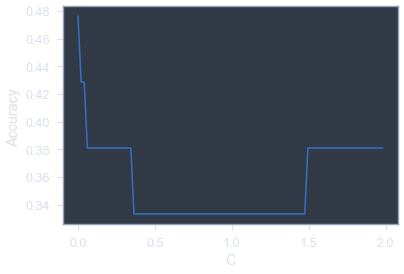

In [27]:
from sklearn.linear_model import LogisticRegression
C = np.linspace(0,2,100)
mean_acc = np.zeros((len(C)-1))

for n in range(1,len(C)):
    LR = LogisticRegression(C=C[n], solver='liblinear',multi_class='auto').fit(X_train,y_train)
    yhat = LR.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
print("Best C = "+str(C[np.argmax(mean_acc)]),"with an accuray of ",str(round(np.max(mean_acc)*100,2)),"%")
plt.plot(C[0:len(C)-1],mean_acc)
plt.ylabel('Accuracy ')
plt.xlabel('C')
plt.show()

# Clustering Algorithms

## 1) K - Means

In [28]:
from sklearn.cluster import KMeans 

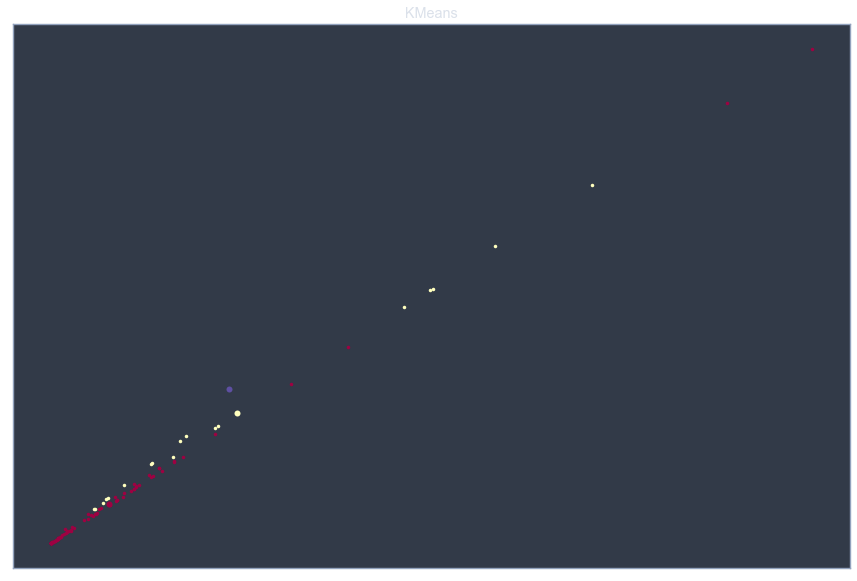

Prediction    = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0]
Correct Value = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy = 9.523809523809524 %


In [29]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 50)
k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = k_means.labels_

# Plot the Graph 
fig = plt.figure(figsize=(15, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'o', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
print("Prediction    =",k_means_labels)
print("Correct Value =",np.array(y)-1)
acc = 0
for i in range(len(y)):
    if k_means_labels[i] == y[i]:
        acc+=1
print("Accuracy =",acc/len(y)*100,"%")